In [42]:
import os
import random
import metpy
import datetime
import s3fs
import copy
import numpy as np
import pandas as pd
import xarray as xr
from pyresample import geometry, grid
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import scipy.stats
from skimage.restoration import wiener
from skimage import data, restoration
from scipy.signal import convolve2d

In [43]:
def find_npy_file(path, file, band):
    """
    Returns the string name of another file from the same time for a given GOES band npy file,
    or None if there is no such file in the given directory.
    
    Parameter path: The path where the returned file is located in
    Precondition: path is a string to a directory relative to the current one, with .npy files
    
    Parameter file: A file from the same time the returned file should have
    Precondition: file is a string with the name of the original file, and includes the path
    
    Parameter band: GOES band the returned file should be from
    Precondition: band is a string of length 2
    """
    for x in os.listdir(path):
        if x[19:21] == band and file[23:37] == x[27:41]:
            return x

In [44]:
filedates = set()
files = []

for file in os.listdir('../../GOES_Files/npy_files'):
    filedates.add(file[27:41])

for file in os.listdir('../../GOES_Files/clear_sky_mask'):
    if file[23:37] in filedates:
        files.append(file)

In [45]:
path = '../../GOES_Files/npy_files/'
pathCM = '../../GOES_Files/clear_sky_mask/'

CM = random.choice(files)
files.remove(CM)

file07 = find_npy_file('../../GOES_Files/npy_files', CM, '07')
file14 = find_npy_file('../../GOES_Files/npy_files', CM, '14')
img07 = np.load(path + file07)
img14 = np.load(path + file14)

# cloud_mask = np.load(pathCM + CM)
# cloud_mask = cloud_mask.astype(bool)
# fires = np.logical_and(fire_mask(img07, img14), np.logical_not(cloud_mask))

In [61]:
diff = img07 - img14
height, width = img.shape
smallimg = resize(img, (round(height/2), round(width/2)))
blurryimg = resize(smallimg, (height, width))
# sharpimg = wiener()

In [65]:
psf = np.ones((5, 5)) / 25
img = convolve2d(diff, psf, 'same')
img += 0.1 * img.std() * np.random.standard_normal(img.shape)
sharpimg = restoration.wiener(img, psf, 1000)

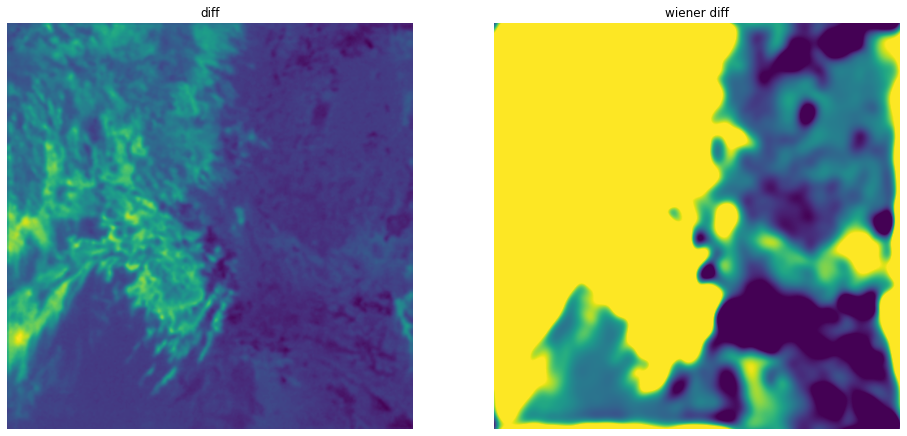

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1]})

ax[0].imshow(blurryimg, aspect='equal')
ax[0].set_title('diff')
ax[0].axis('off')

ax[1].imshow(sharpimg, aspect='equal')
ax[1].set_title('wiener diff')
ax[1].axis('off')

plt.show()

In [55]:
print(mean_absolute_error(img, blurryimg))
print(mean_absolute_error(img, sharpimg))

1.4670007824233326
2.1430381583676508
